# Step 1: Import libraries

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

# Step 2: Read the training dataset into program
1. Use pandas to load the dataset into a padnas dataframe

2. Print the first 5 rows of the dataframe along with the size of the dataframe.

In [54]:
dataFrame = pd.read_csv("clean_data.csv", delimiter = ",")

print(dataFrame.head(5))
numRows, numColumns = dataFrame.shape
print(f"The data frame is {numRows} rows by {numColumns} columns")

             id       screen_name                   location  \
0  8.160000e+17  "HoustonPokeMap"              "Houston, TX"   
1  4.843621e+09         kernyeahx  Templeville town, MD, USA   
2  4.303727e+09   mattlieberisbot                        NaN   
3  3.063139e+09         sc_papers                        NaN   
4  2.955142e+09      lucarivera16      Dublin, United States   

                                         description  \
0  "Rare and strong PokŽmon in Houston, TX. See m...   
1  From late 2014 Socium Marketplace will make sh...   
2  Inspired by the smart, funny folks at @replyal...   
3                                                NaN   
4             Inspiring cooks everywhere since 1956.   

                         url  followers_count  friends_count  listed_count  \
0  "https://t.co/dnWuDbFRkt"             1291              0            10   
1                        NaN                1            349             0   
2    https://t.co/P1e1o0m4KC             108

# Step 3: Data processing
1. Find the number of missing values in each column of your dataframe.

2. Delete all the columns that have more than 35% of the values missing.

In [55]:
numMissing = dataFrame.isnull().sum()

cleanedFrame = dataFrame.dropna(axis = 1, thresh = (0.65 * numRows))
dataFrame = cleanedFrame

# Step 4: Visualization: Friends vs Followers count
1. Use Matplotlib scatter plot to visualize friends_count vs followers_counts for both bots and nonbots. Include a legend in your plot.

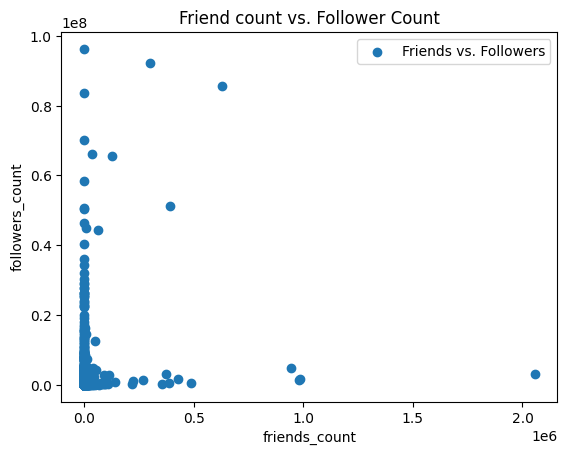

In [56]:
plt.scatter(dataFrame.friends_count, dataFrame.followers_count, label = "Friends vs. Followers")
plt.title("Friend count vs. Follower Count")
plt.xlabel("friends_count")
plt.ylabel("followers_count")
plt.legend()
plt.show()

# Step 5: Feature Engineering
1. Screen_name is a feature in the dataset that describes the public username or handle of the user.

2. Using the following list of strings:<br>
    bag_of_words=[bot, follow me, free, fake, virus, troll, clone, tweet me]

    Introduce new columns:<br>
    • screen_name_binary<br>
    • name_binary<br>
    • description_binary<br>
    • status_binary<br><br>

    The values in each of these columns stores True when the value in the corresponding column contains a substring from the bag_of_words and False when it does not. The value should be False when the corresponding value is NaN.

In [57]:
bag_of_words = ["bot", "follow me", "free", "fake", "virus", "troll", "clone", "tweet me"]

# used to determine true/false for the binary columns
def binary(data):
    if data != "NaN":
        for sub in bag_of_words:
            if sub in str(data).lower(): # .lower() for case insensitivity
                return True
    return False

# use the 'apply' function to add the binary columns
dataFrame.insert(dataFrame.shape[1], "screen_name_binary", dataFrame.screen_name.apply(binary))
dataFrame.insert(dataFrame.shape[1], "name_binary", dataFrame.name.apply(binary))
dataFrame.insert(dataFrame.shape[1], "description_binary", dataFrame.description.apply(binary))
dataFrame.insert(dataFrame.shape[1], "status_binary", dataFrame.status.apply(binary))

# Step 6: Desicion Tree Classifier

1. Import DecisionTreeClassifier (already completed in step 1)
2. Create a subset of the dataframe that includes the target variable as well as the following features:<br>
    • friends_count<br>
    • followers_count<br>
    • screen_name_binary<br>
    • name_binary<br>
    • status_binary<br>
    • verified<br>
    • statuses_count<br>

3. Split the data from part 2 into X (features) and Y (Target variable)
4. Split the data from  part 3 into 70% training and 30% testing dataset.
5. Implement the Decision Tree Classifier
6. Print the training and testing accuracy
7. Using the method sklearn.tree.export_text, print export_text(clf) to get a text based visualization of your classifier

In [58]:
subsetFrame = dataFrame[["bot", "friends_count", "followers_count", "screen_name_binary", "name_binary", "status_binary", "verified", "statuses_count"]]

x = subsetFrame[["friends_count", "followers_count", "screen_name_binary", "name_binary", "status_binary", "verified", "statuses_count"]]
y = subsetFrame[["bot"]]

from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = .3)

clf = DecisionTreeClassifier(criterion = "entropy")
clf.fit(xTrain, yTrain)

yTrainPred = clf.predict(xTrain)
yTestPred = clf.predict(xTest)

from sklearn.metrics import accuracy_score
from sklearn.tree import export_text
print("Training Accuracy: ", accuracy_score(yTrain, yTrainPred))
print("Testing Accuracy: ", accuracy_score(yTest, yTestPred))
print ("\n")
print(export_text(clf))

Training Accuracy:  1.0
Testing Accuracy:  0.8478802992518704


|--- feature_5 <= 0.50
|   |--- feature_0 <= 5.50
|   |   |--- feature_6 <= 35.00
|   |   |   |--- feature_0 <= 3.50
|   |   |   |   |--- feature_1 <= 23407.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_1 >  23407.00
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  3.50
|   |   |   |   |--- feature_1 <= 1.50
|   |   |   |   |   |--- feature_6 <= 2.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_6 >  2.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_1 >  1.50
|   |   |   |   |   |--- class: 0
|   |   |--- feature_6 >  35.00
|   |   |   |--- feature_1 <= 23474.50
|   |   |   |   |--- feature_1 <= 238.50
|   |   |   |   |   |--- feature_6 <= 491.50
|   |   |   |   |   |   |--- feature_6 <= 448.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_6 >  448.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |

# Step 7: Linear Classifier
1. Import the LogisticRegression classifier:<br>
    from sklearn.linear_model import LogisticRegression<br>
    This is a classifier that implements a linear model (contrary to what the name suggests,<br>
    a LogisticRegression classifier is actually used for classification).

2. Using the same training and test data, fit a LogisticRegression classifier. The code should be almost the same,<br>
except that you use clf = LogisticRegression() instead of clf=tree.DecisionTreeClassifier().<br>
You still use the .fit and .predict methods in the same way.

3. Print the training and testing accuracy for the Logistic Regression classifier.

In [59]:
from sklearn.linear_model import LogisticRegression

# LogisticRegression() only takes 1D arrays for the output variable, not 2D arrays with a single column like DecisionTreeClassifier() can
yTrain = yTrain.values.ravel()
yTest = yTest.values.ravel()

# have to adjust the maximum iteration size of the logistic regression object so that it doesn't overflow
clfReg = LogisticRegression(max_iter = len(xTrain))
clfReg.fit(xTrain, yTrain)

yTrainPredReg = clfReg.predict(xTrain)
yTestPredReg = clfReg.predict(xTest)

print("Training Accuracy: ", accuracy_score(yTrain, yTrainPredReg))
print("Testing Accuracy: ", accuracy_score(yTest, yTestPredReg))

Training Accuracy:  0.6909090909090909
Testing Accuracy:  0.7032418952618454


# 1.3: Short Answer

1. Yes, friends_count and followers_ count should be usable for classification. The majority of the data is clustered in the lower-left region of the graph, indicating a relationship between having a low friend count and a low follower count.

2. The training accuracy for the DecisionTree was around 100%, and the testing accuracy was around 85% The testing accuracy is a better representative of the quality of the classifier because the classifier was made using the training data; it's already implied that the training data would match the classifier, and using unrecognized data to test the consistency of the classifier gives more realistic results.

3. Logistic Regression seems to be better than a decision tree for this classification test. Because the training data was 100% for the desicion tree, and it had a lower testing accuracy, we can assume that overfitting occured.

4. <br>
a)

In [60]:
subsetFrame = dataFrame[["bot", "friends_count", "followers_count", "screen_name_binary", "name_binary", "status_binary", "verified", "statuses_count"]]

x = subsetFrame[["friends_count", "followers_count", "screen_name_binary", "name_binary", "status_binary", "verified", "statuses_count"]]
y = subsetFrame[["bot"]]

from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = .3)

clf = DecisionTreeClassifier(criterion = "entropy", max_depth = 2)
clf.fit(xTrain, yTrain)

yTrainPred = clf.predict(xTrain)
yTestPred = clf.predict(xTest)

from sklearn.metrics import accuracy_score
from sklearn.tree import export_text
print("Training Accuracy: ", accuracy_score(yTrain, yTrainPred))
print("Testing Accuracy: ", accuracy_score(yTest, yTestPred))
print ("\n")
print(export_text(clf))

Training Accuracy:  0.7935828877005348
Testing Accuracy:  0.770573566084788


|--- feature_0 <= 43.50
|   |--- feature_5 <= 0.50
|   |   |--- class: 1
|   |--- feature_5 >  0.50
|   |   |--- class: 0
|--- feature_0 >  43.50
|   |--- feature_5 <= 0.50
|   |   |--- class: 0
|   |--- feature_5 >  0.50
|   |   |--- class: 0



b) This new decision tree classifies users based on their friend count and based on whether or not their account is verified

c) These two features, the friend count/interaction on the account and whether or not it's verified, are the best qualifiers for determining whether or not an account is a bot<br>

5. 46.2% (1236/2672) users in the data set are bots. If only 10% of users were bots, 85% accuracy would not be very good as you would be missing a more significant number of bot accounts to false negatives.

In [61]:
print(dataFrame.bot.sum(), "bots out of", len(dataFrame), "users.")

1236 bots out of 2672 users.


6. Assigning the first 70% of data points as training data and last 30% as testing data could be problematic if the data is sorted or ordered in some way, which in the majority of cases it is. This would be problematic because your training data could have some kind of shared or similar quality that your testing data would have less of because of the ordering, or vice versa. It would be better to randomly assign 70% / 30% of the data to training / testing.

7. This assignment pre-determined how to clean missing data from the set, how to how to visualize the data,the account attributes we used to classify accounts, the type of classifiers we used, and percentage split between training/testing data.

# Part 2. More with Decision Tree and Linear Classifiers

# 2.1 Python code

# Step 1: Create an artificial dataset
Create a dataset, stored in a Pandas Dataframe, with the following properties:<br>

1. The dataset has 2 numerical input variables named X1 and X2.

2. The dataset has 1 binary output variable named Y, which is 0 or 1.

3. This dataset has 1000 rows, generated as follows: for each row, generate X1 and X2<br>
as (independent) random real numbers between 0 and 1. The value of Y should be 1<br>
if X1+X2 > 1 and 0 otherwise. To get random numbers between 0 and 1, you can<br>
import random and use random.random()

In [62]:
import random

artificialFrame = pd.DataFrame({"X1": [random.random() for _ in range(1000)], "X2": [random.random() for _ in range(1000)]})
artificialFrame["Y"] = artificialFrame.apply(lambda row: 1 if row["X1"] + row["X2"] > 1 else 0, axis = 1)

# Step 2: Visualization

Create a scatter plot of your data that has the input variables on the two axis. The data points shoul dbe one of two colors, depending on the value of y

<function matplotlib.pyplot.show(close=None, block=None)>

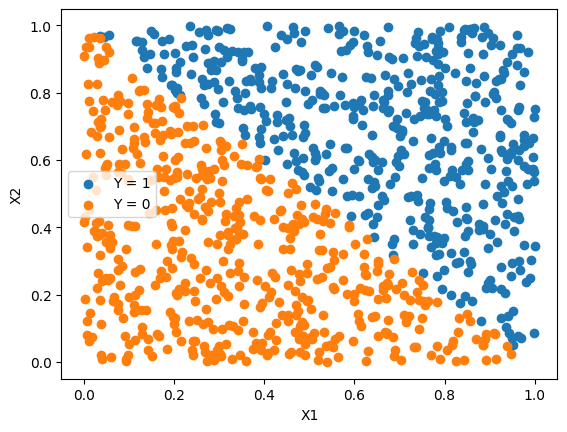

In [63]:
greaterThan1 = artificialFrame[artificialFrame["Y"] == 1]
lessThan1 = artificialFrame[artificialFrame["Y"] == 0]

plt.scatter(greaterThan1["X1"], greaterThan1["X2"], label = "Y = 1")
plt.scatter(lessThan1["X1"], lessThan1["X2"], label = "Y = 0")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.show

# Step 3: Classifier

Fit a DecisionTreeClassifier with parameter max_depth=2 to this<br>
dataset. Then fit a LogisticRegression classifier to this dataset, and print the accuracy<br>
of each classifier (again, on the whole dataset).

In [64]:
clf = DecisionTreeClassifier(criterion = "entropy", max_depth = 2)

X = artificialFrame[['X1', 'X2']]
Y = artificialFrame[['Y']].values.ravel()

clf.fit(X, Y)

yPred = clf.predict(X)

print("Decision Tree Accuracy: ", accuracy_score(Y, yPred))


reg = LogisticRegression()
reg.fit(X, Y)

yPredReg = reg.predict(X)

print("Logistic Regression Accuracy: ", accuracy_score(Y, yPredReg))

Decision Tree Accuracy:  0.859
Logistic Regression Accuracy:  0.991


# 2.2 Short answer

1. I expected the logistic regression classifier to get 100% accuracy on this dataset because there is a linear boundary between the two possible output values: Y = 1 and Y = 0.

2. My decision tree classifier had an accuracy of 0.845

3. The accuracy of the decision tree us 1.0 now that the max_depth parameter has been removed.


In [65]:
clf2 = DecisionTreeClassifier(criterion = "entropy")
clf2.fit(X, Y)
YPred2 = clf2.predict(X)

print("Decision Tree 2 Accuracy: ", accuracy_score(Y, YPred2))

Decision Tree 2 Accuracy:  1.0


4. Without a limited depth, the decision tree eventually traverses through every possible sum in the data set, and determines if it would be greater than or less than 1. It predicts everything perfectly because every possibilty is included in the decision tree.